<h4><b>Proyek Analisis Data Dengan Python: Bike Sharing Dataset</b></h4>

<ul>
  <li>Nama: Adnan Al Qadri</li>
  <li>Email: alqadriadnan2004@gmail.com</li>
  <li>Id Dicoding: -</li>
</ul>

<h4>Menentukan Pertanyaan Bisnis</h4>
<ul>
  <li>Apakah musim berpengaruh terhadap penyewaan sepeda ?</li>
  <li>Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit ?</li>
  <li>Seperti apa tren penyewaan perusahaan dalam beberapa tahun terakhir ?</li>
  <li>Bagaimana perbandingan penyewa yang telah mendaftar berlangganan(registered) dibandingkan dengan tidak berlangganan(casual) ?</li>
</ul>


##### Import semua library yang dibutuhkan

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Wrangling

##### Gathering Data

In [2]:
# load data days
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# load data hours
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

dapat dilihat bahwa pada data day tidak terdapat missing value

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

kedua data aman dari missing value

In [8]:
# cek apakah ada duplikasi data
print('duplikasi di data day: ', day_df.duplicated().sum())
print('duplikasi di data hour: ', hour_df.duplicated().sum())


duplikasi di data day:  0
duplikasi di data hour:  0


tidak ada duplikasi data

In [9]:
# cek keanehan data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


tidak ada keanehan data yang ditemukan

#### Cleaning Data

In [11]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
print(day_df['dteday'].dtype)

object


tugas

<ul>
   <li>dropping column: instant, dan working day karena data hampir mirip dengan weekday</li>
   <li>mengubah tipe data dteday menjadi tipe data datetime</li>
   <li>mengubah tipe data 'season', 'mnth', 'holiday', 'weekday', 'workingday', dan 'weathersit' 
   menjadi tipe data categorial</li>
   <li>Mengganti nama kolom agar lebih mudah dibaca</li>
   <li>Mengkonversi isi kolom agar mudah dipahami</li>
   <li> Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays</li>
</ul>

In [13]:
day_df.drop(['instant'], axis=1, inplace=True)
day_df.drop(['workingday'], axis=1, inplace=True)

hour_df.drop(['instant'], axis=1, inplace=True)
hour_df.drop(['workingday'], axis=1, inplace=True)


In [14]:
# mengubaj tipe data dteday
day_df['dteday']=pd.to_datetime(day_df['dteday'])
hour_df['dteday']=pd.to_datetime(hour_df['dteday'])

In [15]:
columns = ['season','mnth', 'holiday','weekday','weathersit']

for column in columns:
    day_df[column] = day_df[column].astype("category")
    hour_df[column] = hour_df[column].astype("category")

In [16]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_df dan hour_df
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [17]:
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [18]:
# Penerapan One Hot Encoding
# merubah season/musim menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Menghitung Humidity
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

C:\Users\alqad\AppData\Local\Temp\ipykernel_24240\4186145016.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
C:\Users\alqad\AppData\Local\Temp\ipykernel_24240\4186145016.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.

In [19]:
# Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [20]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

In [21]:
day_df.head()

,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
0,2011-01-01,Spring,2011,Jan,0,Saturday,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985,weekend,Terlalu Lembab
1,2011-01-02,Spring,2011,Jan,0,Sunday,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801,weekend,Terlalu Lembab
2,2011-01-03,Spring,2011,Jan,0,Monday,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349,weekdays,Terlalu kering
3,2011-01-04,Spring,2011,Jan,0,Tuesday,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562,weekdays,Ideal
4,2011-01-05,Spring,2011,Jan,0,Wednesday,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600,weekdays,Terlalu kering


In [22]:
hour_df.head()

,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,Clear,0.24,0.2879,81.0,0.0,3,13,16,weekend,Terlalu Lembab
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,Clear,0.22,0.2727,80.0,0.0,8,32,40,weekend,Terlalu Lembab
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,Clear,0.22,0.2727,80.0,0.0,5,27,32,weekend,Terlalu Lembab
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,Clear,0.24,0.2879,75.0,0.0,3,10,13,weekend,Terlalu Lembab
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,Clear,0.24,0.2879,75.0,0.0,0,1,1,weekend,Terlalu Lembab


#### Exploratory Data Analysis (EDA)

In [23]:
#explore lengkap rangkuman data day_df
day_df.describe(include="all")

,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [24]:
# melihat jumlah penyewaan tiap season 
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

C:\Users\alqad\AppData\Local\Temp\ipykernel_24240\350100656.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


dari data diatas kita mendapatkan informasi bahwa pada musim fall memiliki jumlah pelanggan yang terbanyak

In [25]:
# melihat jumlah penyewaan tiap tahun berdasarkan registered dan casul 
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


dapat dilihat dari data bahwa penyewa sepeda yang dari member sangat banyak, cukup jauh berbeda dengan pengguna casual 

In [26]:
# explore data hour_df
hour_df.describe(include="all")

,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,Fall,2012,Jul,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [27]:
# cek penyewaan berdasarkan jam
hour_df.groupby(by="hours").agg({
    "count_cr": "sum"
}).sort_values(by='count_cr', ascending=False)

,count_cr
hours,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


dapat dilihat bahwa lonjakan tertinggi penyewaan sepeda, terjadi di sekitar jam 17

dan yang paling sepi sekitar jam 4

#### Visualization & Explanatory Analysis

tugas
<ul>
   <li>pada musim apa penyewaan sepeda paling banyak?</li>
   <li>Bagaimana performa jasa penyewaan dalam beberapa tahun terakhir?</li>
   <li>Seberapa banyak seseorang yang memilih registered dibandingkan dengan casual</li>
   <li>jam berapa yang paling banyak dan paling sedikit disewa?</li>
</ul>

In [28]:

# melakukan grouping terhadap hours dan count_cr 
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

Pertanyaan 1: pada musim apa penyewaan sepeda paling banyak

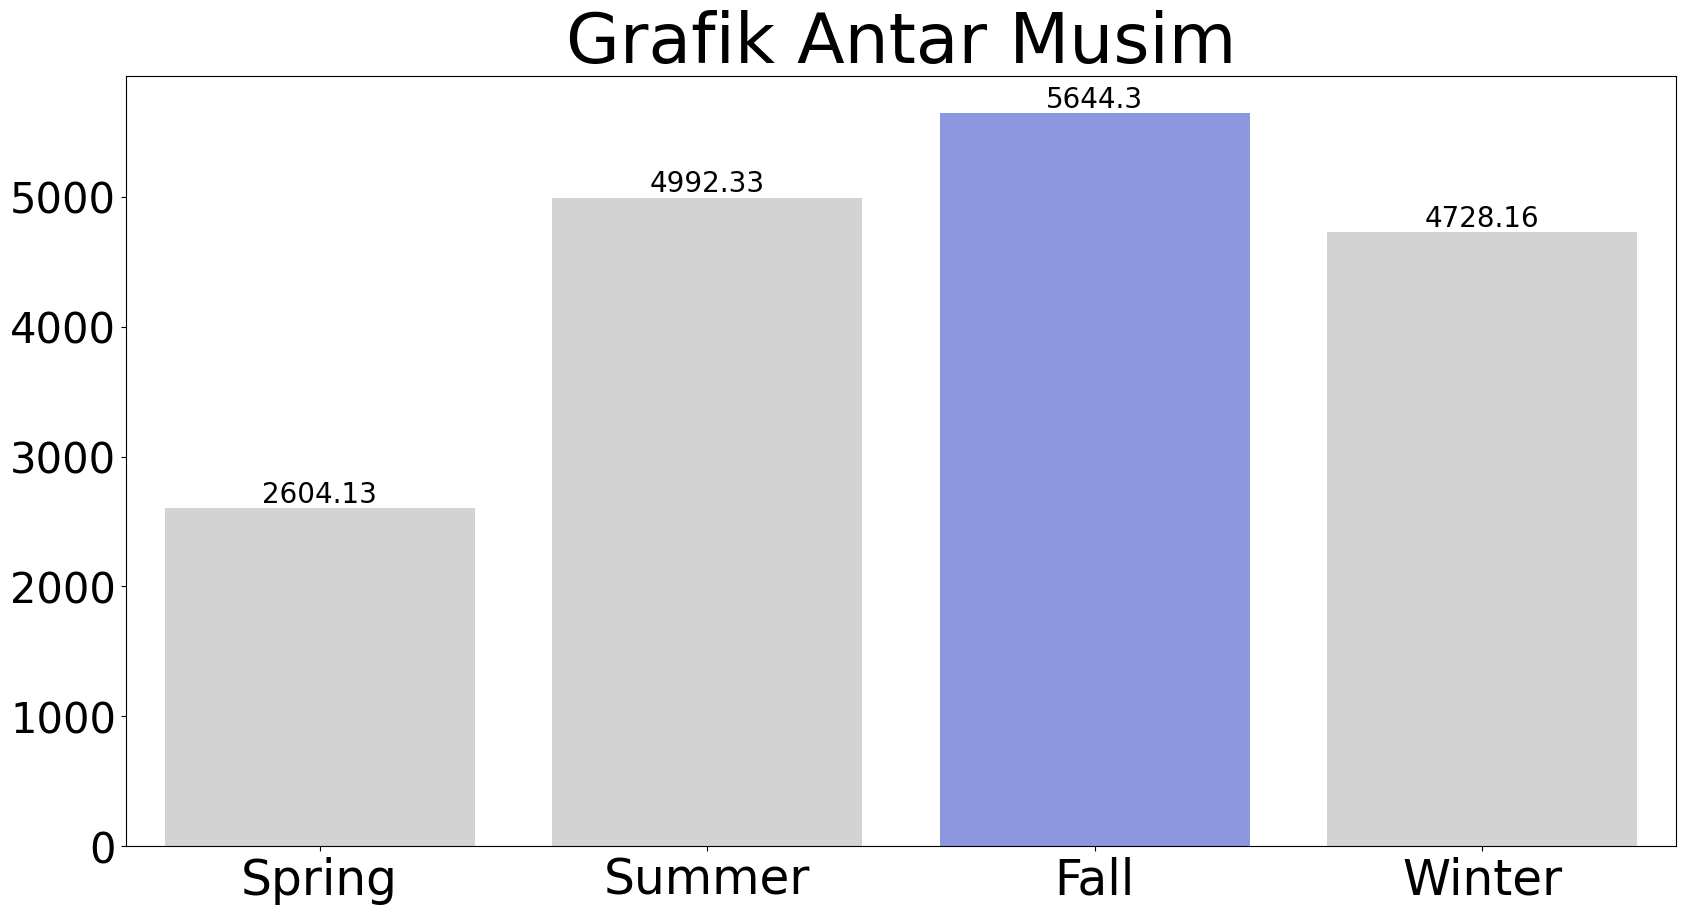

In [29]:
# mengatur warna
colors = ["#D3D3D3", "#D3D3D3", "#7e8ded", "#D3D3D3"]

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot untuk y="count_cr" dan x="season", menggunakan data=day_df
sns.barplot(
        y="count_cr", 
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        hue='season',
        palette=colors,
        ax=ax,
        errorbar=None,  # Menghilangkan confidence interval atau error bars
        legend=False
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# Menambahkan label nilai di atas setiap bar
for i in ax.containers:
    ax.bar_label(i, fontsize=20)

# menampilkan plot
plt.show()


dari tampilan data diatas kita tau bahwa penyewaan terbanyak ada pada musim(season) fall 

Pertanyaan 2: bagaimana performa jasa penyewaan dalam beberapa tahun terakhir

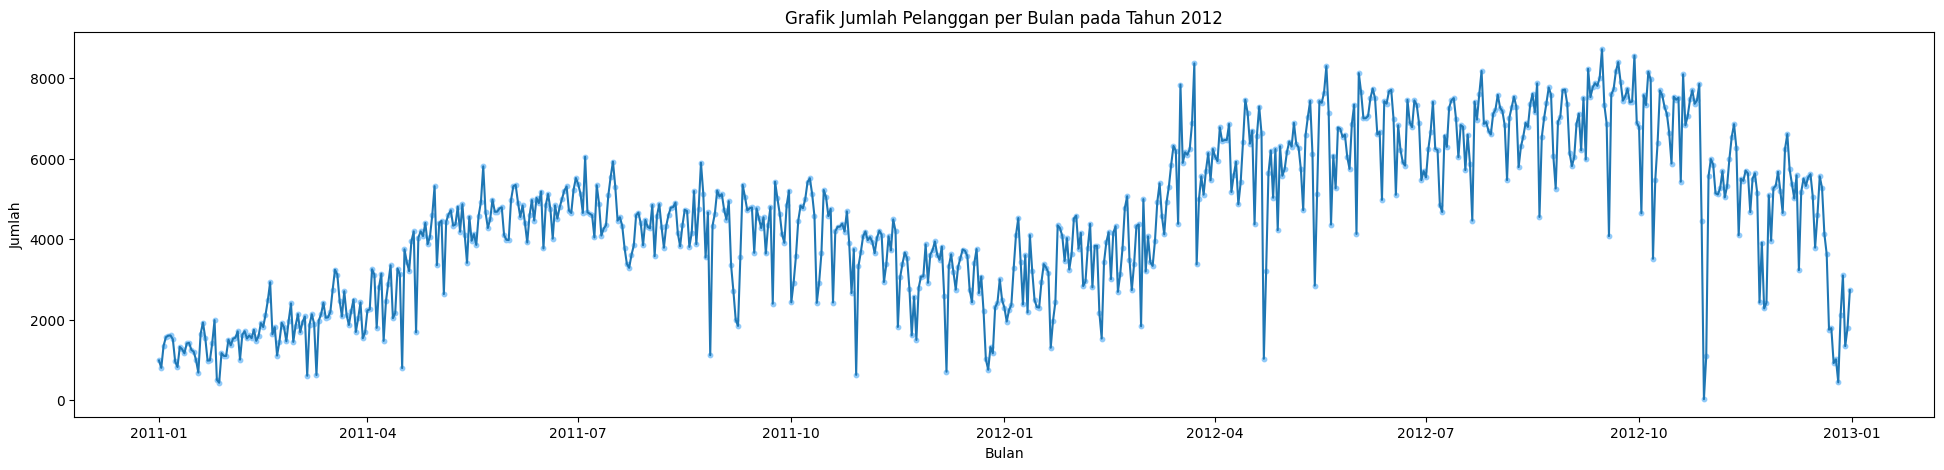

In [30]:
# 

# mmebuat figure dengan ukuran (24, 5)
plt.figure(figsize=(24, 5))

# menghitung jumlah pelanggan maksimum per bulan
monthly_counts = day_df['count_cr'].groupby(day_df['dteday']).max()

# membuat scatter plot untuk jumlah pelanggan maksimum per bulan, dengan warna biru dan marker 'o'
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')

# membuat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(monthly_counts.index, monthly_counts.values)

# penamaan untuk sumbu x
plt.xlabel('Bulan')

# penamaan untuk sumbu y
plt.ylabel('Jumlah')

# buat judul
plt.title('Grafik Jumlah Pelanggan per Bulan pada Tahun 2012')

# menampilkan plot
plt.show()


dapat dilihat dari tampilan data di atas, bahwa pada tahun 2012 bulan 1 sampai 2012 bulan 4 penyewaan sepeda mengalami kenaikan yang cukup drastis, dan dari 2012 bulan 4 sampai 2012 bulan 10 penyewaan sepeda tinggi dan stabil, dan dari 2012 bulan 10 sampai 2013 bulan 1 penyewaan sepeda mengalami penurunan

Pertanyaan 3: Seberapa banyak seseorang yang memilih registered dibandingkan dengan casual

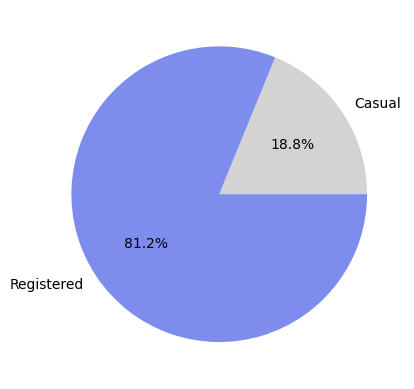

In [31]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#7e8ded"])

# Menampilkan pie plot
plt.show()

dari data di atas dapat dilihat bahwa penyewa sepeda oleh member lebih banyak daripada penyewa kasual, yang perbandingannya 81.2% : 18.8%

Pertanyaan 4: jam berapa paling banyak dan paling sedikti disewa

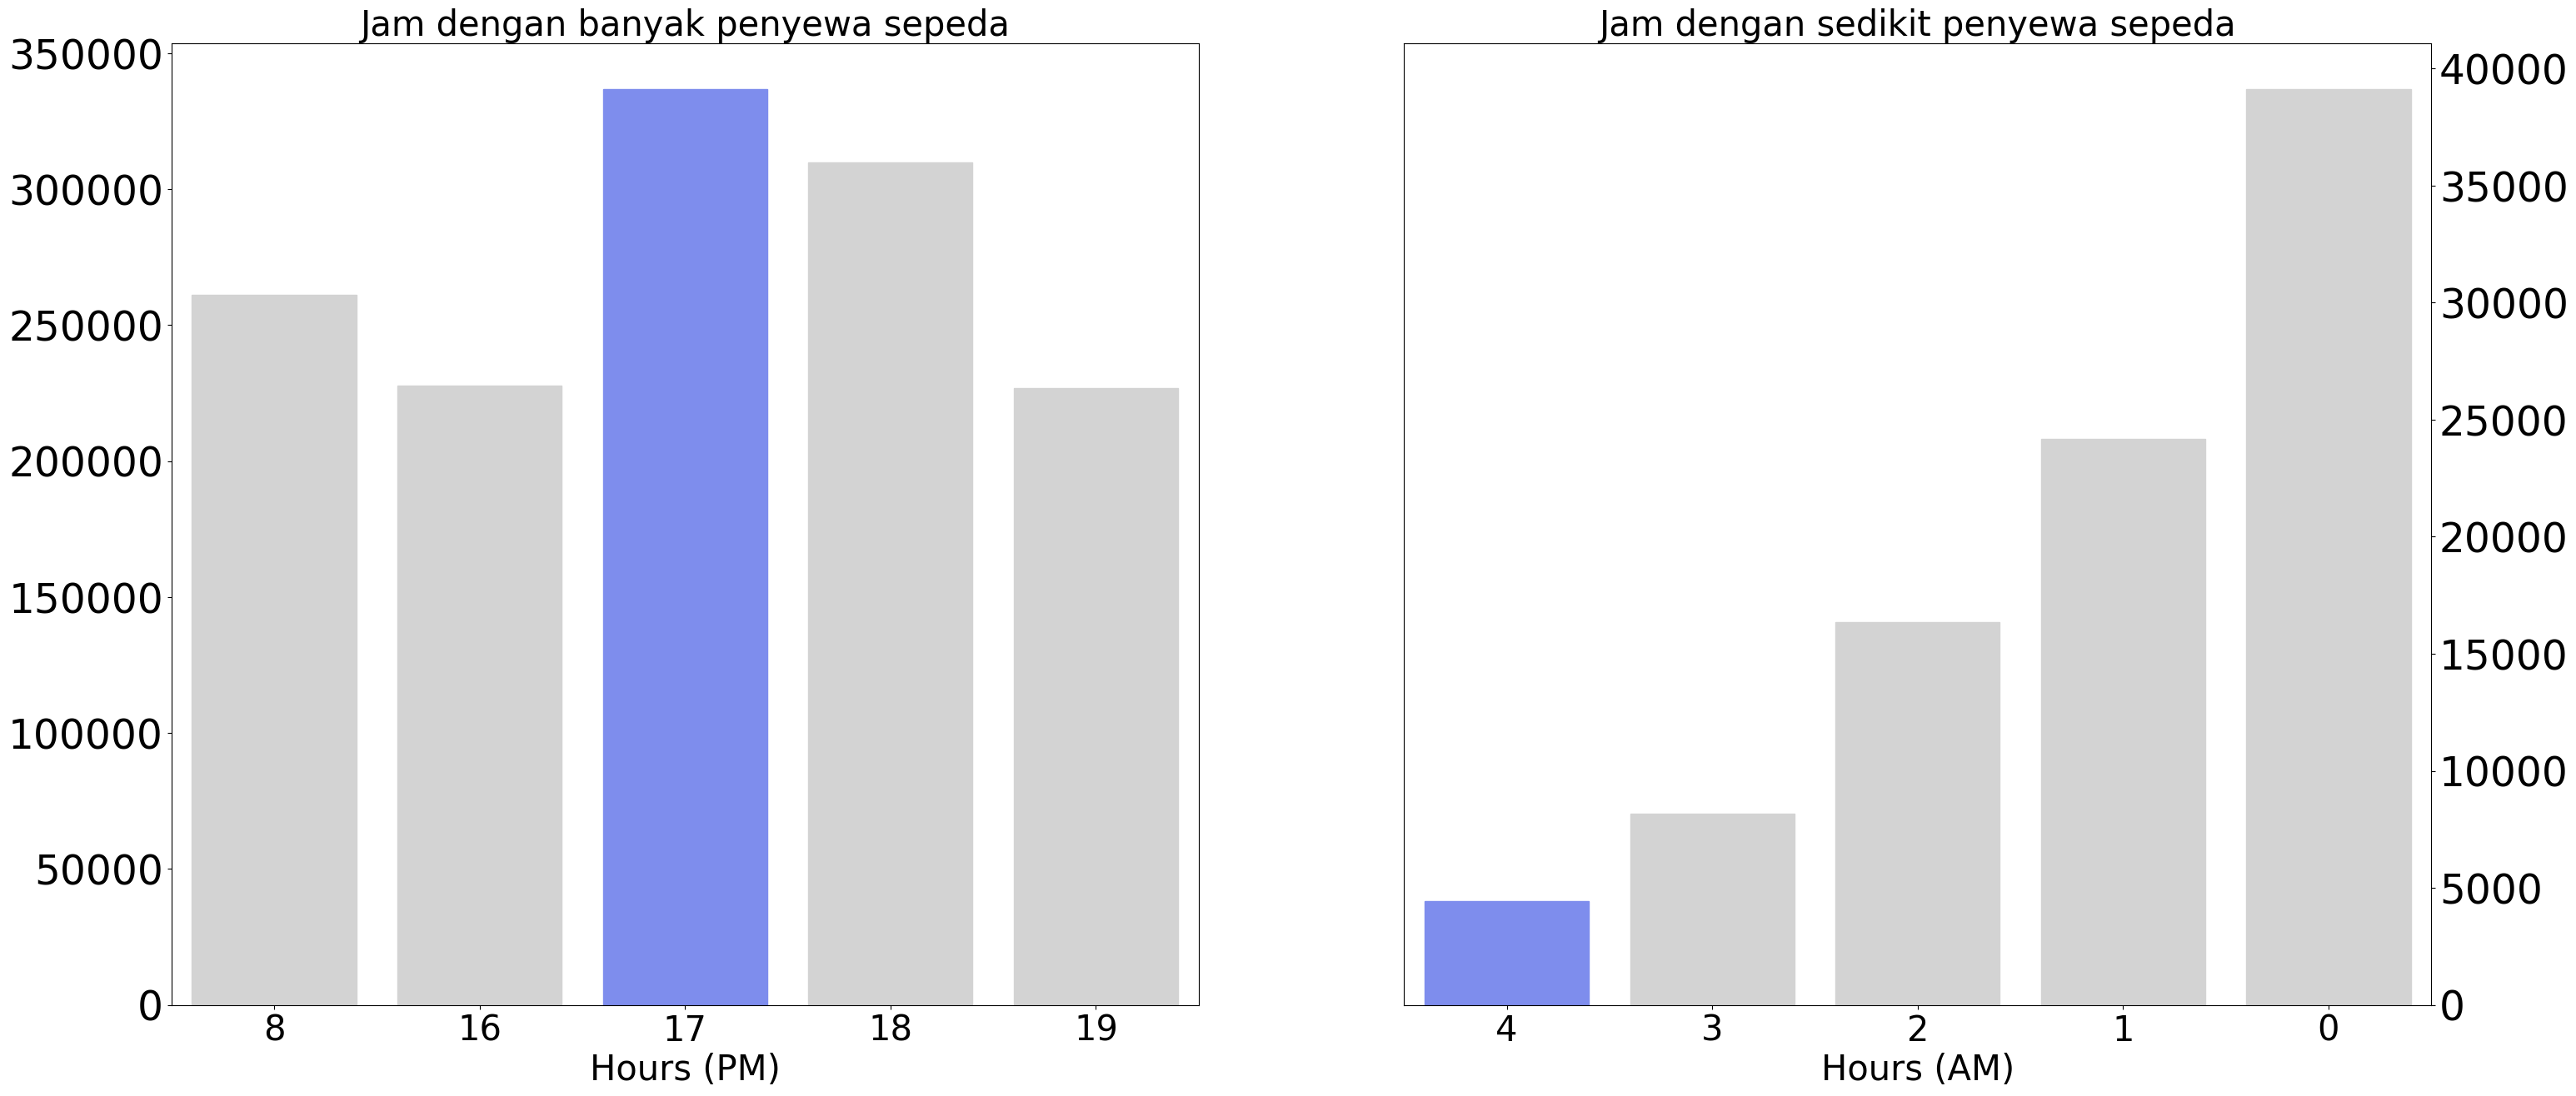

In [32]:

# membuat canvas kosong
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))
 
# membuat barplot untuk penyewa sepeda terbanyak 
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), ax=ax[0], hue="hours", dodge=False, legend=False)
for i, bar in enumerate(ax[0].patches):
    if i == 2:  # indeks untuk bar yang ingin diwarnai berbeda
        bar.set_color("#7e8ded")
    else:
        bar.set_color("#D3D3D3")

# mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# membuat barplot untuk penyewa sepeda terdikit 
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), ax=ax[1], hue="hours", dodge=False, legend=False)
for i, bar in enumerate(ax[1].patches):
    if i == 4:  # indeks untuk bar yang ingin diwarnai berbeda
        bar.set_color("#7e8ded")
    else:
        bar.set_color("#D3D3D3")

# mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)



# menampilkan plot
plt.show()

berdasarkan visualisasi data di atas kita bisa lihat bahwa pada jam 17 merupakan penyewaan terbanyak, dan pada jam 4 penyewaan yang paling sedikit

#### Conclusion 

Pertanyaan:

- pada musim apa penyewaan sepeda paling banyak?

- Bagaimana performa jasa penyewaan dalam beberapa tahun terakhir?

- Seberapa banyak seseorang yang memilih registered dibandingkan dengan casual ?

- jam berapa yang paling banyak dan paling sedikit disewa?


-Conclution pertanyaan 1: dari tampilan data kita tau bahwa penyewaan terbanyak ada pada musim(season) fall

-Conclution pertanyaan 2: dapat dilihat dari tampilan , bahwa pada tahun 2012 bulan 1 sampai 2012 bulan 4 penyewaan sepeda mengalami kenaikan yang cukup drastis, dan dari 2012 bulan 4 sampai 2012 bulan 10 penyewaan sepeda tinggi dan stabil, dan dari 2012 bulan 10 sampai 2013 bulan 1 penyewaan sepeda mengalami penurunan

-Conclution pertanyaan 3: dari data di atas dapat dilihat bahwa penyewa sepeda oleh member lebih banyak daripada penyewa kasual, yang perbandingannya 81.2% : 18.8%

-Conclution pertanyaan 4: berdasarkan visualisasi data kita bisa lihat bahwa pada jam 17 merupakan penyewaan terbanyak, dan pada jam 4 penyewaan yang paling sedikit